# 数据才是王道→数据预处理与数据集构建

In [1]:
# !pip install -U scikit-learn
import sklearn
sklearn.__version__

'1.3.2'

# 处理缺省值

In [3]:
import numpy as np
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

<br>
<br>

## 可以直接删除缺省值多的样本或者特征

In [5]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
# only drop rows where all columns are NaN
df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


<br>
<br>

## 重新计算缺省值

In [10]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [11]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [12]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

<br>
<br>

## 了解scikit-learn预测器API

<div class="sl-block is-focused" data-block-type="image" data-name="image-1cebc0" style="width: 415.012px; height: 291.078px; left: 326.595px; top: 382.222px;" data-origin-id="3d63d368b5e9e00b49c08297dc92677b"><div class="sl-block-content" style="z-index: 34;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017693/04_04.png" class="" data-natural-width="874" data-natural-height="613"></div></div>

---

<div class="sl-block is-focused" data-block-type="image" data-name="image-e22a4f" style="width: 458.349px; height: 291.078px; left: -131.754px; top: 382.222px;" data-origin-id="27a94fe8a321d07efd714d602cf5c4fd"><div class="sl-block-content" style="z-index: 35;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017694/04_05.png" class="" data-natural-width="1740" data-natural-height="1105"></div></div>

<br>
<br>

# 处理类别型数据

In [13]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


<br>
<br>

## 序列特征映射

In [14]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [15]:
# 映射回来
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

<br>
<br>

## 类别编码

In [16]:
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [17]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [18]:
# 映射回来
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [19]:
# 另一种办法，用 sklearn
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [20]:
# 映射回来
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

<br>
<br>

## 对类别型的特征用one-hot编码

In [21]:
df[['color', 'size', 'price']].values

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [25]:
X = df[['color', 'size', 'price']].values

# color_le = LabelEncoder()
# X[:, 0] = color_le.fit_transform(X[:, 0])
# X
# 无意义的数值有序性

In [26]:
# 法一：
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto')
ohe.fit_transform(X[:,:1]).toarray()
# ohe.fit_transform(X).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [27]:
X[:,:1]

array([['green'],
       ['red'],
       ['blue']], dtype=object)

In [28]:
# 法二：
pd.get_dummies(df[['price', 'color', 'size']], dtype='float')

,price,size,color_blue,color_green,color_red
0,10.1,1,0.0,1.0,0.0
1,13.5,2,0.0,0.0,1.0
2,15.3,3,1.0,0.0,0.0


<br>
<br>

# 切分数据集(训练集与测试集)

在wine数据集中，这些数据包括了三种酒中13种不同成分的数量。

文件中，每行代表一种酒的样本，共有178个样本；一共有14列，其中，第一个属性是类标识符，分别是1/2/3来表示，代表葡萄酒的三个分类。

后面的13列为每个样本的对应属性的样本值。剩余的13个属性是，酒精、苹果酸、灰、灰分的碱度、镁、总酚、黄酮类化合物、非黄烷类酚类、原花色素、颜色强度、色调、稀释葡萄酒的OD280/OD315、脯氨酸。

其中第1类有59个样本，第2类有71个样本，第3类有48个样本。

In [29]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
## 备用
# df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

# df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
#                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
#                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
#                    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
#                    'Proline']
# df_wine.head()

In [30]:
df_wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<hr>

In [32]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

<br>
<br>

# 对连续值特征做幅度缩放(scaling)

<div class="sl-block is-focused" data-block-type="image" data-name="image-c14473" style="width: 598.222px; height: 336.5px; left: 616.715px; top: 344.25px; min-width: 1px; min-height: 1px;" data-origin-id="e25583f192af5963073123d91baa39c4"><div class="sl-block-content" style="z-index: 36;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017870/pasted-from-clipboard.png" class="" data-natural-width="1920" data-natural-height="1080"></div></div>

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [34]:
X_train_norm.max(axis=0), X_train_norm.min(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

<div class="sl-block is-focused" data-block-type="image" data-name="image-6d0111" style="width: 712.419px; height: 291.074px; left: -95.704px; top: 366.963px;" data-origin-id="931ab1c1c11e251ee34be9257c1fa356"><div class="sl-block-content" style="z-index: 37;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017872/pasted-from-clipboard.png" class="" data-natural-width="1400" data-natural-height="572"></div></div>

In [35]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [36]:
X_train_std.mean(axis=0), X_train_std.std(axis=0)

(array([ 2.89016123e-15, -1.25560404e-15,  1.14514133e-15,  2.56246637e-15,
        -3.25904178e-16, -1.35106979e-15,  2.77555756e-16, -1.63936964e-15,
         1.08157211e-15,  3.43811001e-16, -1.82649594e-16,  1.06903733e-15,
         2.28311993e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

- 手撸 A visual example:

In [37]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])

# standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)

# Please note that pandas uses ddof=1 (sample standard deviation) 
# by default, whereas NumPy's std method and the StandardScaler
# uses ddof=0 (population standard deviation)

# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


<br>
<br>

# 特征选择

## 通过L1正则化的截断性效应选择

- L1/L2正则化的用处
    - L1正则化可以产生稀疏权值矩阵，即产生一个稀疏模型，可以用于特征选择。
    - L2正则化可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合。

<div class="sl-block is-focused" data-block-type="image" data-name="image-20db55" style="width: 447.196px; height: 342.048px; left: 248.707px; top: 315.352px;" data-origin-id="7271c144b2d86a4a7be20b9094dcddaf"><div class="sl-block-content" style="z-index: 38;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017899/04_12.png" class="" data-natural-width="1765" data-natural-height="1350"></div></div>

这张图展示了L2正则化在逻辑回归中的几何解释。

在图中，我们有两个权重 $ w_1 $ 和 $ w_2 $，它们构成了参数空间。目标是找到一组权重，使得损失函数 $ J(w) $ 最小化。

- Minimize cost: 这是没有正则化时的损失函数的等高线图。等高线越靠近中心，损失函数的值越小。最小化损失函数的目标是找到位于最内层等高线的权重组合。

- Minimize penalty: 这是正则化项 $ \lambda ||w||^2 $ 的等高线图，其中 $ ||w||^2 = w_1^2 + w_2^2 $ 是权重向量的L2范数的平方。这个圆形区域表示了具有相同L2范数的权重组合。正则化项的目标是限制权重的大小，使其尽可能小。

- Minimize cost + penalty: 当我们将损失函数和正则化项结合起来时，我们的目标是找到一个权重组合，既能使损失函数最小化，又能满足正则化约束。在图中，这对应于损失函数的等高线与正则化项的圆形区域相切的点。这个相切点代表了损失函数和正则化项的最优平衡。

数学上，带有L2正则化的逻辑回归的损失函数可以表示为：

$$ J(w) = \sum_{i=1}^{n} [-y^{(i)} \log(\sigma(w^T x^{(i)})) - (1 - y^{(i)}) \log(1 - \sigma(w^T x^{(i)}))] + \frac{\lambda}{2} ||w||^2 $$

其中，$ \sigma(w^T x) $ 是sigmoid函数，$ y^{(i)} $ 是第i个样本的真实类别，$ x^{(i)} $ 是第i个样本的特征向量，$ \lambda $ 是正则化参数，$ ||w||^2 $ 是权重向量的L2范数的平方。

最小化这个损失函数会导致找到一个权重向量 $ w $，它不仅适应数据，而且其大小受到限制，从而防止模型过于复杂，减少过拟合的风险。

---

<div class="sl-block is-focused" data-block-type="image" data-name="image-bff631" style="width: 441.429px; height: 342.685px; left: -196.524px; top: 315.352px;" data-origin-id="8f97cbcbbd7ece953d1057811481fa10"><div class="sl-block-content" style="z-index: 39;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017904/04_13.png" class="" data-natural-width="1739" data-natural-height="1350"></div></div>

这张图展示了L1正则化在逻辑回归中的几何解释。与L2正则化类似，L1正则化也是一种减少过拟合的技术，但它通过添加一个与权重的L1范数（即权重的绝对值之和）成比例的正则项来实现。

在图中，$ w_1 $ 和 $ w_2 $ 是模型的两个权重参数，它们构成了参数空间。目标是找到一组权重，使得损失函数 $ J(w) $ 加上正则化项的总和最小。

- Minimize cost: 这是没有正则化时的损失函数的等高线图。等高线越靠近中心，损失函数的值越小。最小化损失函数的目标是找到位于最内层等高线的权重组合。

- Minimize penalty: 这是正则化项 $ \lambda ||w||^1 $ 的等高线图，其中 $ ||w||^1 = |w_1| + |w_2| $ 是权重向量的L1范数。这个菱形区域表示了具有相同L1范数的权重组合。正则化项的目标是限制权重的大小，使其尽可能小。

- Minimize cost + penalty: 当我们将损失函数和正则化项结合起来时，我们的目标是找到一个权重组合，既能使损失函数最小化，又能满足正则化约束。在图中，这对应于损失函数的等高线与正则化项的菱形区域相切的点。这个相切点代表了损失函数和正则化项的最优平衡。

数学上，带有L1正则化的逻辑回归的损失函数可以表示为：

$$ J(w) = \sum_{i=1}^{n} [-y^{(i)} \log(\sigma(w^T x^{(i)})) - (1 - y^{(i)}) \log(1 - \sigma(w^T x^{(i)}))] + \lambda ||w||^1 $$

其中，$ \sigma(w^T x) $ 是sigmoid函数，$ y^{(i)} $ 是第i个样本的真实类别，$ x^{(i)} $ 是第i个样本的特征向量，$ \lambda $ 是正则化参数，$ ||w||^1 $ 是权重向量的L1范数。

L1正则化的一个重要特性是它倾向于产生稀疏的权重向量，即许多权重参数会变成0。这在图中表现为最优解往往在坐标轴上，这意味着某些特征的权重会被完全消除，从而实现特征选择。这可以在高维数据集中去除不重要的特征，有助于模型的解释性和泛化能力。

---

可以直观的理解为（帮助理解正则化），我们的目标函数 (误差函数) 就是求等高线+框子的和的最小值，而这个值通在很多情况下是两个曲面相交的地方。

<div class="sl-block is-focused" data-block-type="image" data-name="image-916846" style="width: 509.742px; height: 255.169px; left: 39.948px; top: -248.669px;" data-origin-id="1e7b9d79f9495b027270b4f49b670d83"><div class="sl-block-content" style="z-index: 40;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017907/04_14.png" class="" data-natural-width="855" data-natural-height="428"></div></div>



In [39]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1)
lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9814814814814815


In [40]:
lr.intercept_

array([-0.38378274, -0.15807572, -0.70041647])

In [41]:
lr.coef_

array([[ 0.28003046,  0.        ,  0.        , -0.02791445,  0.        ,
         0.        ,  0.71004632,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.236664  ],
       [-0.64399089, -0.06875825, -0.05721557,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92674339,
         0.06017484,  0.        , -0.3710346 ],
       [ 0.        ,  0.06148151,  0.        ,  0.        ,  0.        ,
         0.        , -0.63603139,  0.        ,  0.        ,  0.49805856,
        -0.35829485, -0.57126163,  0.        ]])

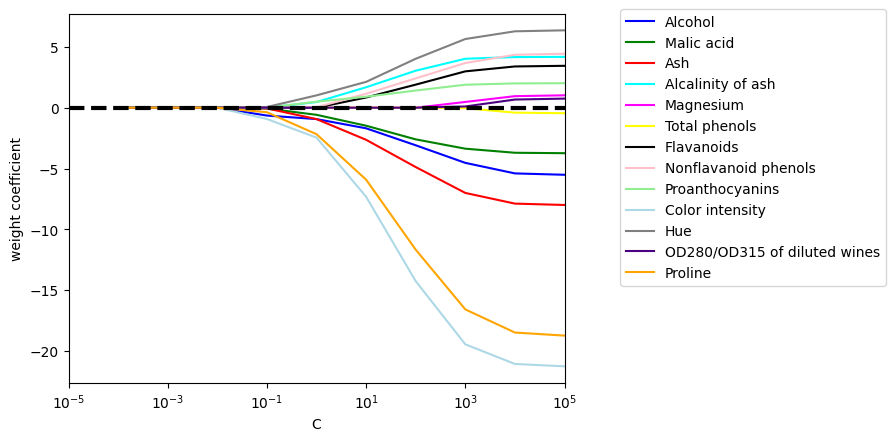

In [42]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    # lr = LogisticRegression(penalty='l2', solver='lbfgs', C=10**(c*1.0), random_state=0)
    lr = LogisticRegression(penalty='l1', solver='liblinear', C=10**(c*1.0), random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**(c*1.0))

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

<div class="sl-block is-focused" data-block-type="image" data-name="image-185339" style="width: 544.61px; height: 392.4px; left: 270.265px; top: 234px;" data-origin-id="ab36e26c416a278d1917e09e66639989"><div class="sl-block-content" style="z-index: 41;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017926/pasted-from-clipboard.png" class="" data-natural-width="619" data-natural-height="446"></div></div>

<br>
<br>

## 子特征集选择法

实现了一种称为顺序后向选择（Sequential Backward Selection, SBS）的特征选择算法。

SBS旨在通过顺序地移除特征来改善分类器的性能，直到达到预定数量的特征。

以下是SBS算法的工作原理：

1. 初始化：算法开始时，考虑所有的特征。

2. 拟合和评分：在每一步中，算法都会尝试移除每个特征，然后使用剩余的特征来训练模型，并评估模型的性能。

3. 移除特征：选择能使模型性能最优（例如，准确度最高）的特征组合，并移除一个特征。

4. 迭代：重复步骤2和3，直到达到预定的特征数量。

下面定义了 SBS 类实现了这个算法。它接受一个评估器（例如KNN分类器）、目标特征数量、评分函数、测试集大小和随机状态作为输入。fit 方法执行了上述的算法步骤：

- 使用 train_test_split 将数据分为训练集和测试集。
- 初始化一些变量来跟踪当前的特征集合、最佳特征子集和它们的评分。
- 在一个循环中，使用 combinations 生成当前特征集合的所有可能的子集，每次移除一个特征。
- 对每个子集，使用 _calc_score 方法来评估其性能。这个方法训练评估器并计算测试集上的准确度。
- 找到最佳的特征子集（即给出最高准确度的子集）并更新变量。
- 当达到预定的特征数量时停止。

transform 方法则使用选定的最佳特征子集来转换输入的数据集。

最后，来绘制不同特征数量对应的模型性能图。这可以帮助我们可视化特征数量与模型准确度之间的关系，并选择一个合适的特征子集大小。

In [43]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

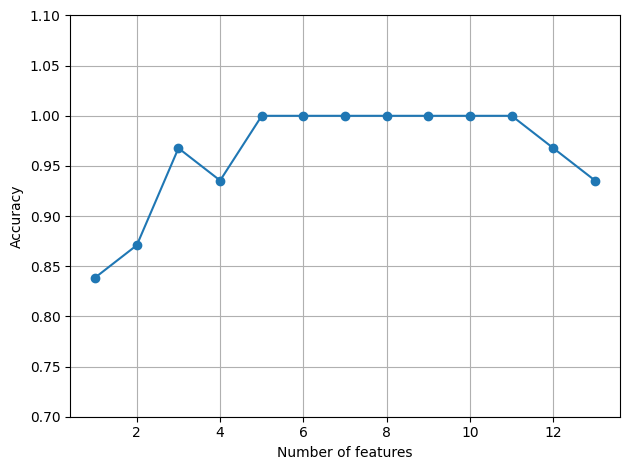

In [44]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [46]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'Proline'], dtype='object')


In [47]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9838709677419355
Test accuracy: 0.9444444444444444


In [48]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629



- 这种方法的优点是可以通过减少特征的数量来减少模型的复杂度，有时还可以提高模型的泛化能力。
- 然而，这种方法的缺点是计算成本较高，因为它需要训练多个模型来评估每个特征子集的性能。

# 通过随机森林对特征重要性排序


下面使用随机森林分类器来评估特征的重要性，并基于这些重要性分数来选择特征。

随机森林是一种集成学习方法，它通过构建多个决策树并将它们的预测结果进行汇总来进行分类或回归。在训练过程中，随机森林能够提供每个特征对于预测结果的贡献度，即**特征重要性**。

特征选择的过程如下：

1. 训练随机森林：首先，使用训练数据X_train和对应的标签y_train来训练随机森林分类器。

2. 获取特征重要性：训练完成后，通过feature_importances_属性获取每个特征的重要性分数。

3. 排序特征：将特征按照它们的重要性分数进行降序排序。

4. 打印特征重要性：打印每个特征的名称和对应的重要性分数。

5. 可视化特征重要性：使用条形图可视化每个特征的重要性。

6. 选择特征：使用SelectFromModel类创建一个选择器对象，它使用随机森林分类器和一个阈值来选择特征。只有那些重要性分数高于阈值的特征会被选中。

7. 变换数据集：调用transform方法应用特征选择器到训练数据X_train，得到只包含选中特征的数据集X_selected。

8. 打印选中的特征：打印出被选中的特征及其重要性分数。


 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948
 4) OD280/OD315 of diluted wines   0.131987
 5) Alcohol                        0.106589
 6) Hue                            0.078243
 7) Total phenols                  0.060718
 8) Alcalinity of ash              0.032033
 9) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


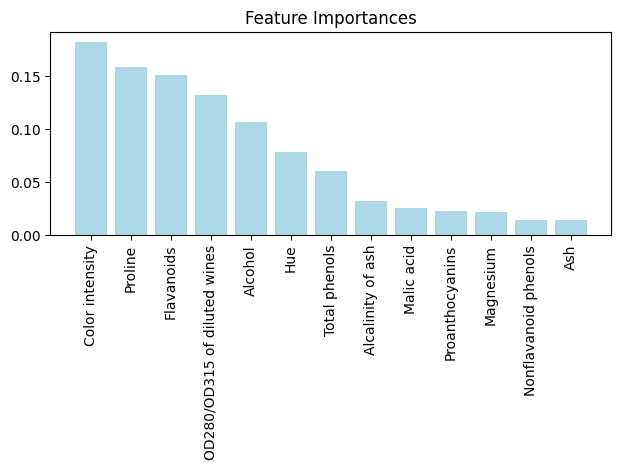

In [49]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

在下面这个例子中，阈值被设置为0.15，这意味着只有那些重要性分数高于0.15的特征会被选中。最后，代码打印出了被选中的特征的数量和它们的名称。



In [52]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.15, prefit=True)
X_selected = sfm.transform(X_train)

X_selected.shape

(124, 3)

Now, let's print the 3 features that met the threshold criterion for feature selection that we set earlier (note that this code snippet does not appear in the actual book but was added to this notebook later for illustrative purposes):

In [53]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Color intensity                0.182483
 2) Proline                        0.158610
 3) Flavanoids                     0.150948


- 这种基于模型的特征选择方法的优点是它考虑了特征之间的相互作用，并且能够捕捉到非线性关系。
- 然而，它的缺点是可能会过分依赖于所使用的模型，如果模型本身的假设与数据不匹配，可能会导致不理想的特征选择结果。

<div class="sl-block is-focused" data-block-type="image" data-name="image-185339" style="width: 544.61px; height: 392.4px; left: 270.265px; top: 234px;" data-origin-id="ab36e26c416a278d1917e09e66639989"><div class="sl-block-content" style="z-index: 41;"><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1094055/images/11017926/pasted-from-clipboard.png" class="" data-natural-width="619" data-natural-height="446"></div></div>